In [1]:
  from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing Libraries

In [2]:
import sys, os
import cv2
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization,AveragePooling2D
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.utils import np_utils

Reading Data Set

In [14]:
df=pd.read_csv('/content/drive/MyDrive/Team 7/fer2013.csv')
x_train,y_train,x_test,y_test=[],[],[],[]

for index, row in df.iterrows():
    val=row['pixels'].split(' ')
    if 'Training' in row['Usage']:
        x_train.append(np.array(val,'float32'))
        y_train.append(row['emotion'])
    elif 'PublicTest' in row['Usage'] or 'PrivateTest' in row['Usage']:
        x_test.append(np.array(val,'float32'))
        y_test.append(row['emotion'])



x_train=np.array(x_train,'float32')
y_train=np.array(y_train,'float32')
x_test=np.array(x_test,'float32')
y_test=np.array(y_test,'float32')


y_train=np_utils.to_categorical(y_train, num_classes=7)
y_test=np_utils.to_categorical(y_test, num_classes=7)

# Normalizing 

In [15]:

x_train-=np.mean(x_train,axis=0)
x_train/=np.std(x_train,axis=0)

x_test-=np.mean(x_test,axis=0)
x_test/=np.std(x_test,axis=0)



x_train=x_train.reshape(x_train.shape[0],48,48,1)
x_test=x_test.reshape(x_test.shape[0],48,48,1)





#  CNN

In [6]:
model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(x_train.shape[1:])))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(Dropout(0.5))

#2nd convolution layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(Dropout(0.5))

#3rd convolution layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))

model.add(Flatten())

#fully connected neural network 1st layer
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(7, activation='softmax'))

model.summary()



#Compliling the model

model.compile(loss=categorical_crossentropy,
              optimizer=Adam(),
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 46, 46, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 21, 21, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 21, 21, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 64)        0

Training

In [7]:
training=model.fit(x_train, y_train,batch_size=64,epochs=30,verbose=1,validation_data=(x_test, y_test),shuffle=True)

Epoch 1/30
449/449 [==============================] - 54s 16ms/step - loss: 2.0894 - accuracy: 0.2908 - val_loss: 2.1714 - val_accuracy: 0.3221
Epoch 2/30
449/449 [==============================] - 6s 14ms/step - loss: 1.5073 - accuracy: 0.4066 - val_loss: 1.3789 - val_accuracy: 0.4727
Epoch 3/30
449/449 [==============================] - 6s 14ms/step - loss: 1.3949 - accuracy: 0.4651 - val_loss: 1.2864 - val_accuracy: 0.5067
Epoch 4/30
449/449 [==============================] - 6s 14ms/step - loss: 1.3166 - accuracy: 0.4962 - val_loss: 1.2415 - val_accuracy: 0.5265
Epoch 5/30
449/449 [==============================] - 6s 14ms/step - loss: 1.2466 - accuracy: 0.5234 - val_loss: 1.2454 - val_accuracy: 0.5283
Epoch 6/30
449/449 [==============================] - 6s 14ms/step - loss: 1.1906 - accuracy: 0.5443 - val_loss: 1.1745 - val_accuracy: 0.5440
Epoch 7/30
449/449 [==============================] - 6s 14ms/step - loss: 1.1461 - accuracy: 0.5632 - val_loss: 1.1622 - val_accuracy: 0.560

Saving Model

In [8]:
model_json =model.to_json()
with open("/content/drive/MyDrive/Team 7/model.json","w") as json_file:
    json_file.write(model_json)
model.save_weights("/content/drive/MyDrive/Team 7/model.h5")

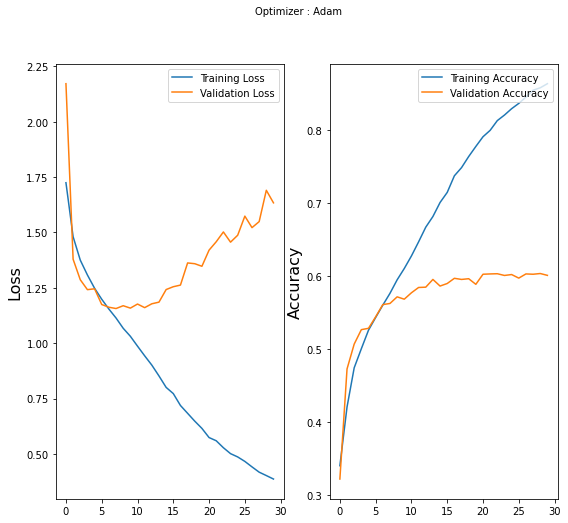

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,8))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(training.history['loss'], label='Training Loss')
plt.plot(training.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(training.history['accuracy'], label='Training Accuracy')
plt.plot(training.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='upper right')
plt.show()